# LinkedIn Job Posting Analysis Project

### Project Scope:
- **Job Roles:** Data Analyst, Data Scientist
- **Locations:** India, Remote
- **Data Source:** LinkedIn Job Postings
- **Objective:** To analyze skill requirements, location trends, and job posting patterns.

In [38]:
import pandas as pd

df = pd.read_csv('../data/ds_salaries.csv')

df.head()


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [39]:
print("Dataset shape:", df.shape)

print("\nColumns in the dataset:")
print(df.columns)

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())



Dataset shape: (3909, 17)

Columns in the dataset:
Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size         

In [40]:
columns_to_drop = ['Unnamed: 0', 'index', 'Competitors']
df_clean = df.drop(columns=columns_to_drop)

print("Missing Values:\n")
print(df_clean.isnull().sum())

df_clean.head()


Missing Values:

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Easy Apply           0
dtype: int64


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1


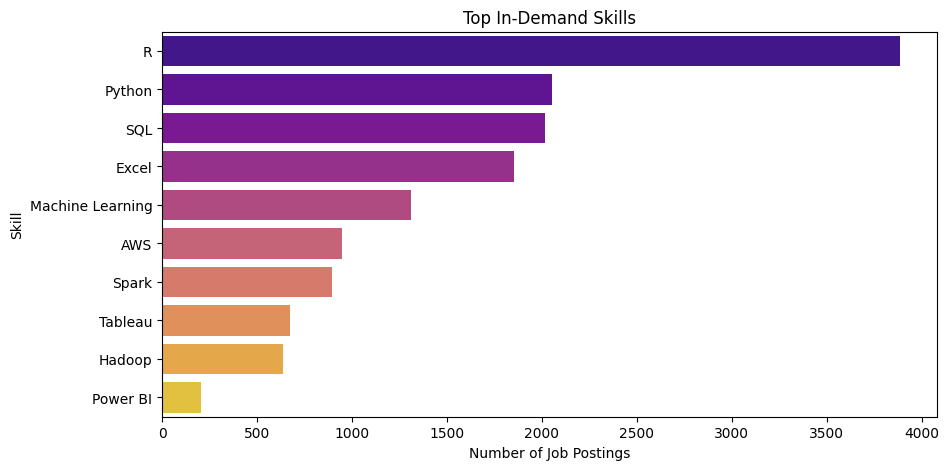

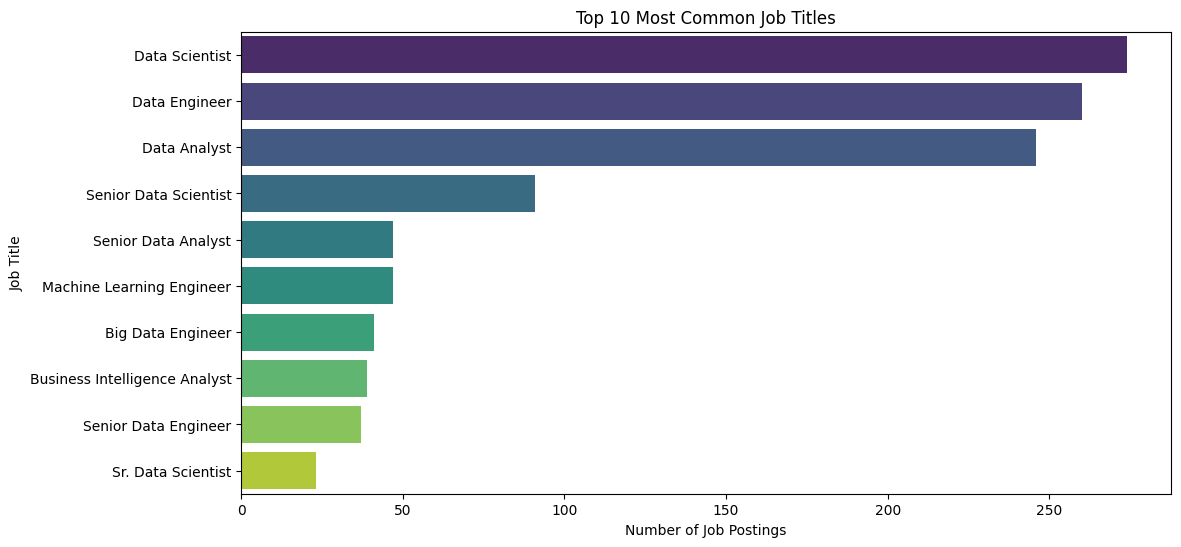

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most common job titles
plt.figure(figsize=(12,6))
sns.countplot(y='Job Title', data=df_clean, order=df_clean['Job Title'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.show()

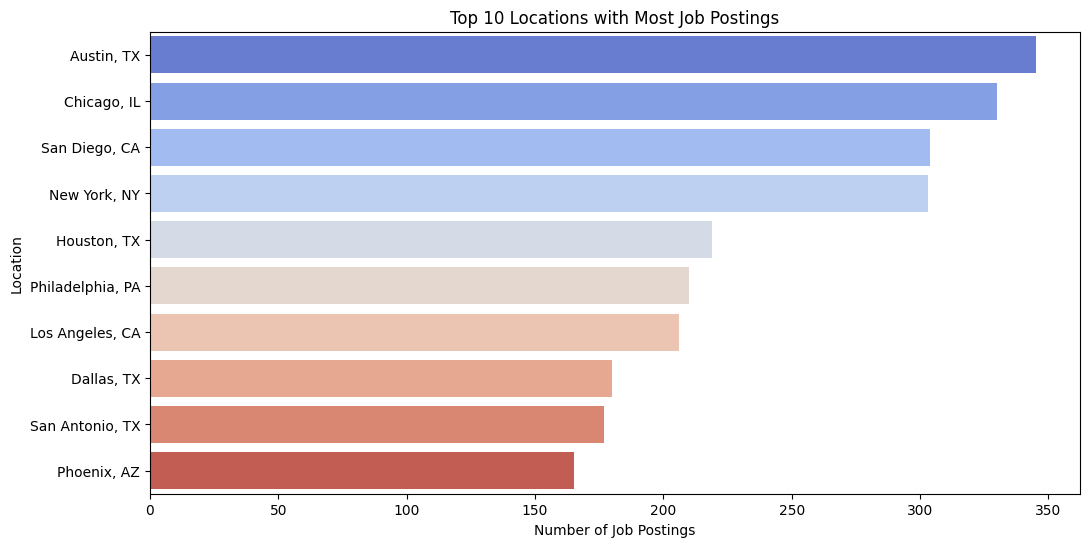

In [42]:
# Top 10 locations with the most job postings
plt.figure(figsize=(12,6))
sns.countplot(y='Location', data=df_clean, order=df_clean['Location'].value_counts().head(10).index, palette='coolwarm')
plt.title('Top 10 Locations with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()

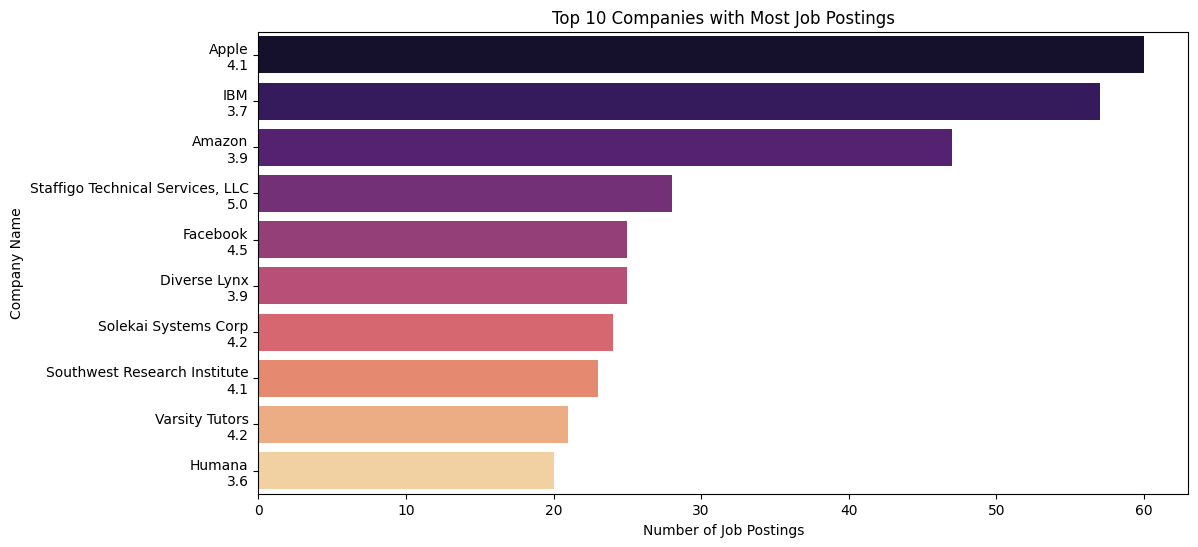

In [43]:
# Top 10 companies hiring the most
plt.figure(figsize=(12,6))
sns.countplot(y='Company Name', data=df_clean, order=df_clean['Company Name'].value_counts().head(10).index, palette='magma')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.show()

In [44]:
# Check sample salary estimates
df_clean['Salary Estimate'].head(10)

0    $111K-$181K (Glassdoor est.)
1    $111K-$181K (Glassdoor est.)
2    $111K-$181K (Glassdoor est.)
3    $111K-$181K (Glassdoor est.)
4    $111K-$181K (Glassdoor est.)
5    $111K-$181K (Glassdoor est.)
6    $111K-$181K (Glassdoor est.)
7    $111K-$181K (Glassdoor est.)
8    $111K-$181K (Glassdoor est.)
9    $111K-$181K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [45]:
df_salary = pd.read_csv('../data/ds_salaries.csv')

df_salary = df_salary[df_salary['Salary Estimate'].str.contains('per hour', case=False) == False]

df_salary['Salary Estimate Cleaned'] = df_salary['Salary Estimate'].apply(lambda x: x.split('(')[0].replace('$', '').replace('K', '').replace(' ', ''))

df_salary[['Min Salary', 'Max Salary']] = df_salary['Salary Estimate Cleaned'].str.split('-', expand=True)

df_salary['Min Salary'] = pd.to_numeric(df_salary['Min Salary'], errors='coerce')
df_salary['Max Salary'] = pd.to_numeric(df_salary['Max Salary'], errors='coerce')

df_salary['Avg Salary'] = (df_salary['Min Salary'] + df_salary['Max Salary']) / 2

df_salary[['Min Salary', 'Max Salary', 'Avg Salary']].head()


,Min Salary,Max Salary,Avg Salary
0,111,181,146.0
1,111,181,146.0
2,111,181,146.0
3,111,181,146.0
4,111,181,146.0


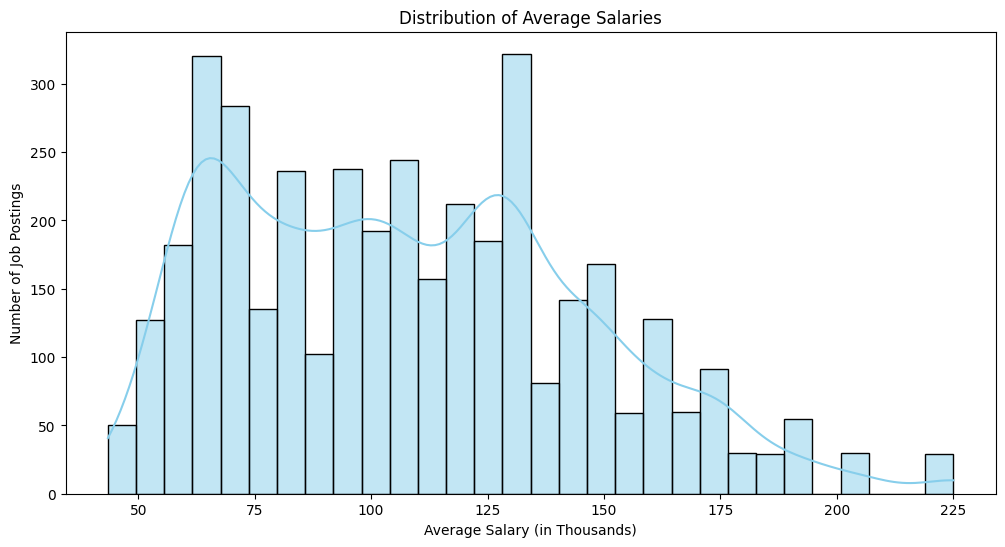

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df_salary['Avg Salary'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary (in Thousands)')
plt.ylabel('Number of Job Postings')
plt.show()

In [47]:
skills = ['Python', 'SQL', 'Excel', 'Tableau', 'Machine Learning', 'R', 'Power BI', 'Hadoop', 'Spark', 'AWS']


for skill in skills:
    df_salary[skill] = df_salary['Job Description'].str.lower().apply(lambda x: 1 if skill.lower() in x else 0)
skill_counts = df_salary[skills].sum().sort_values(ascending=False)

df_salary[skills].head()


,Python,SQL,Excel,Tableau,Machine Learning,R,Power BI,Hadoop,Spark,AWS
0,0,1,0,1,1,1,0,0,0,0
1,1,1,1,0,1,1,0,0,0,0
2,1,0,1,0,1,1,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0
4,1,0,1,0,1,1,0,0,0,0


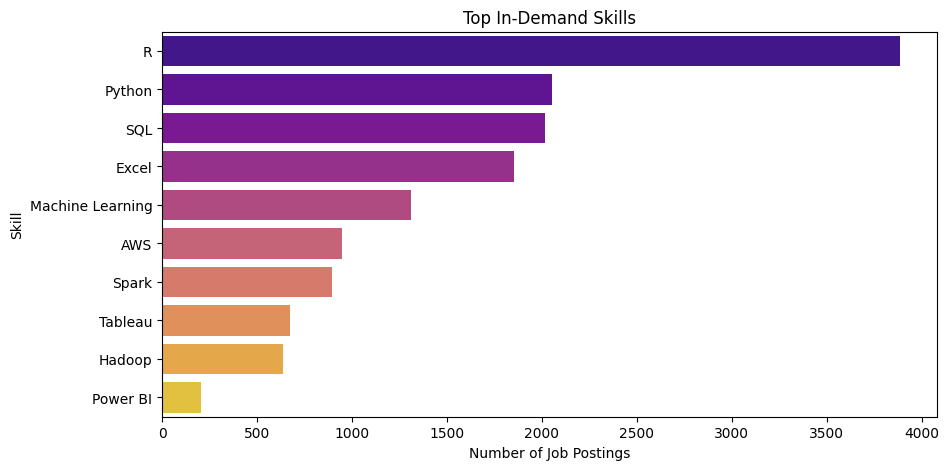

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='plasma', ax=ax)
ax.set_xlabel('Number of Job Postings')
ax.set_ylabel('Skill')
ax.set_title('Top In-Demand Skills')
plt.show()


# 📊 Project Summary: LinkedIn Job Posting Analysis

### Key Insights:
- ✅ The most in-demand job titles are: Data Scientist, Data Engineer, Data Analyst
- ✅ The top hiring locations are: Austin(TX), Chicago(IL), San Diego(CA)
- ✅ The companies hiring the most are: Applease, IBM, Amazon
- ✅ The most offered average salaries fall between: 146K Dollars
- ✅ The most in-demand skills are: R,Python, SQL, excel, Machine learning

### Tools & Techniques Used:
- Python, Pandas, Matplotlib, Seaborn
- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Salary Parsing & Extraction
- Skill Extraction from Job Descriptions

### Possible Improvements:
- Scrape real-time job postings using Selenium or APIs.
- Automate periodic updates to track job market trends.
- Add more job roles and locations for deeper insights.
